Họ tên : Nguyễn Thị Nga

MSSV : 21130791

In [1]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv("telecom_churn_clean.csv")
churn_df.head(10)


,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


### 1. Binary classification
### There are two types of supervised learning — classification and regression. Binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one. Your task is to examine the data and choose which column could be the target variable for binary classification.

### 1. Phân loại nhị phân
### Có hai loại học tập có giám sát - phân loại và hồi quy. Phân loại nhị phân được sử dụng để dự đoán một biến đích chỉ có hai nhãn, thường được biểu diễn bằng số bằng số không hoặc một. Nhiệm vụ của bạn là kiểm tra dữ liệu và chọn cột nào có thể là biến đích để phân loại nhị phân.

In [2]:
# Kiểm tra dữ liệu và chọn cột nào có thể là biến đích (target variable) để phân loại nhị phân.
# df['churn'].value_counts()


### 2. Khảo sát: fit và predict


### 3. Using scikit-learn to fit a classfier

In [3]:
from sklearn.neighbors import KNeighborsClassifier
X = df[["total_day_charge", "total_eve_charge"]].values
y = df["churn"].values
print(X.shape, y.shape)

NameError: name 'df' is not defined

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

### 4. Predicting on unlabeled data

In [ ]:
X_new = np.array([[56.8, 17.5], 
                  [24.4, 24.1],
                  [50.1, 10.9]])
print(X_new.shape)


(3, 2)


In [ ]:
predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions))

Predictions: [1 0 0]


### 5. Train/test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.872


### 6. KNN for Classification using Scikit-learn

#### 6.1.Load the necessary python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### 6.2.Load the dataset

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 6.3.Let's observe the shape of the dataframe.

In [ ]:
df.shape

(768, 9)

Như đã quan sát ở trên, chúng ta có 768 hàng và 9 cột. 8 cột đầu tiên đại diện cho các tính năng và cột cuối cùng đại diện cho mục tiêu / nhãn.

#### 6.4.Let's create numpy arrays for features and target

In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values


#### 6.5.Importing train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

It is a best practice to perform our split in such a way that out split reflects the labels in the data. In other words, we want labels to be split in train and test set as they are in the original dataset. So we use the stratify argument.
Also we create a test set of size of about 40% of the dataset.

#### 6.6.Create a test set of size of about 40% of the dataset.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

Let's create a classifier using k-Nearest Neighbors algorithm.

First let us first observe the accuracies for different values of k.

#### 6.7.
#### - Import KNeighborsClassifier
#### - Setup arrays to store training and test accuracies

In [ ]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# Setup arrays to store training and test accuracies
neighbors = np.arange(1, 9)
# print(neighbors)
train_accuracy = np.empty(len(neighbors))
print(train_accuracy.shape)
test_accuracy = np.empty(len(neighbors))
print(test_accuracy.shape)

for i,k in enumerate(neighbors):
    # Set up a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

(8,)
(8,)


#### 6.8.Generate plot

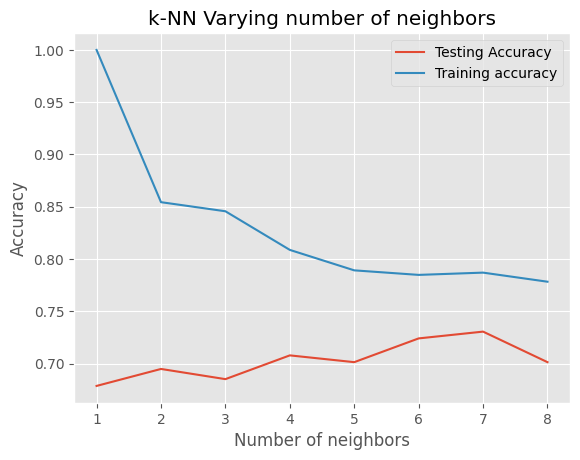

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel("Accuracy")
plt.show()

Chúng ta có thể quan sát ở trên rằng chúng ta đạt được Accuracy thử nghiệm tối đa với k=7. Vì vậy, hãy tạo KNeighborsClassifier với số lượng neighbors là 7.

#### 6.9.Setup a knn classifier with k neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

#### 6.10.Fit the model

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(algorithm='auto', leaf_size=30 metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

#### 6.11.Get accuracy. Note: In case of classification algorithms score method represents accuracy.

In [ ]:
knn.score(X_test, y_test)

0.7305194805194806

#### 6.12.Import confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

#### 6.13.Let us get the predictions using the classifier we had fit above

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[165,  36],
       [ 47,  60]], dtype=int64)

Considering confusion matrix above:

True negative = 165

False positive = 36

True postive = 60

Fasle negative = 47

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


#### 6.14.import classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



#### 6.15.ROC (Reciever Operating Charecteristic) curve

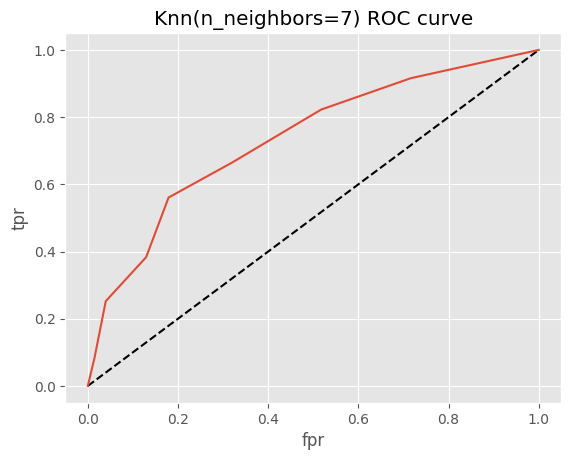

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, threholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

#### 6.16.Area under ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.7345050448691124

#### 6.17.Import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#### 6.18.In case of classifier like knn the parameter to be tuned is n_neighbors

In [ ]:
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.7578558696205755

In [ ]:
knn_cv.best_params_

{'n_neighbors': 14}

Do đó, một bộ phân loại knn có số lượng lân cận là 14 sẽ đạt được điểm/độ chính xác tốt nhất là 0,7578, tức là khoảng 76%

### 7. Fitting and Overfitting

#### 7.1.Code ảnh dưới đây:

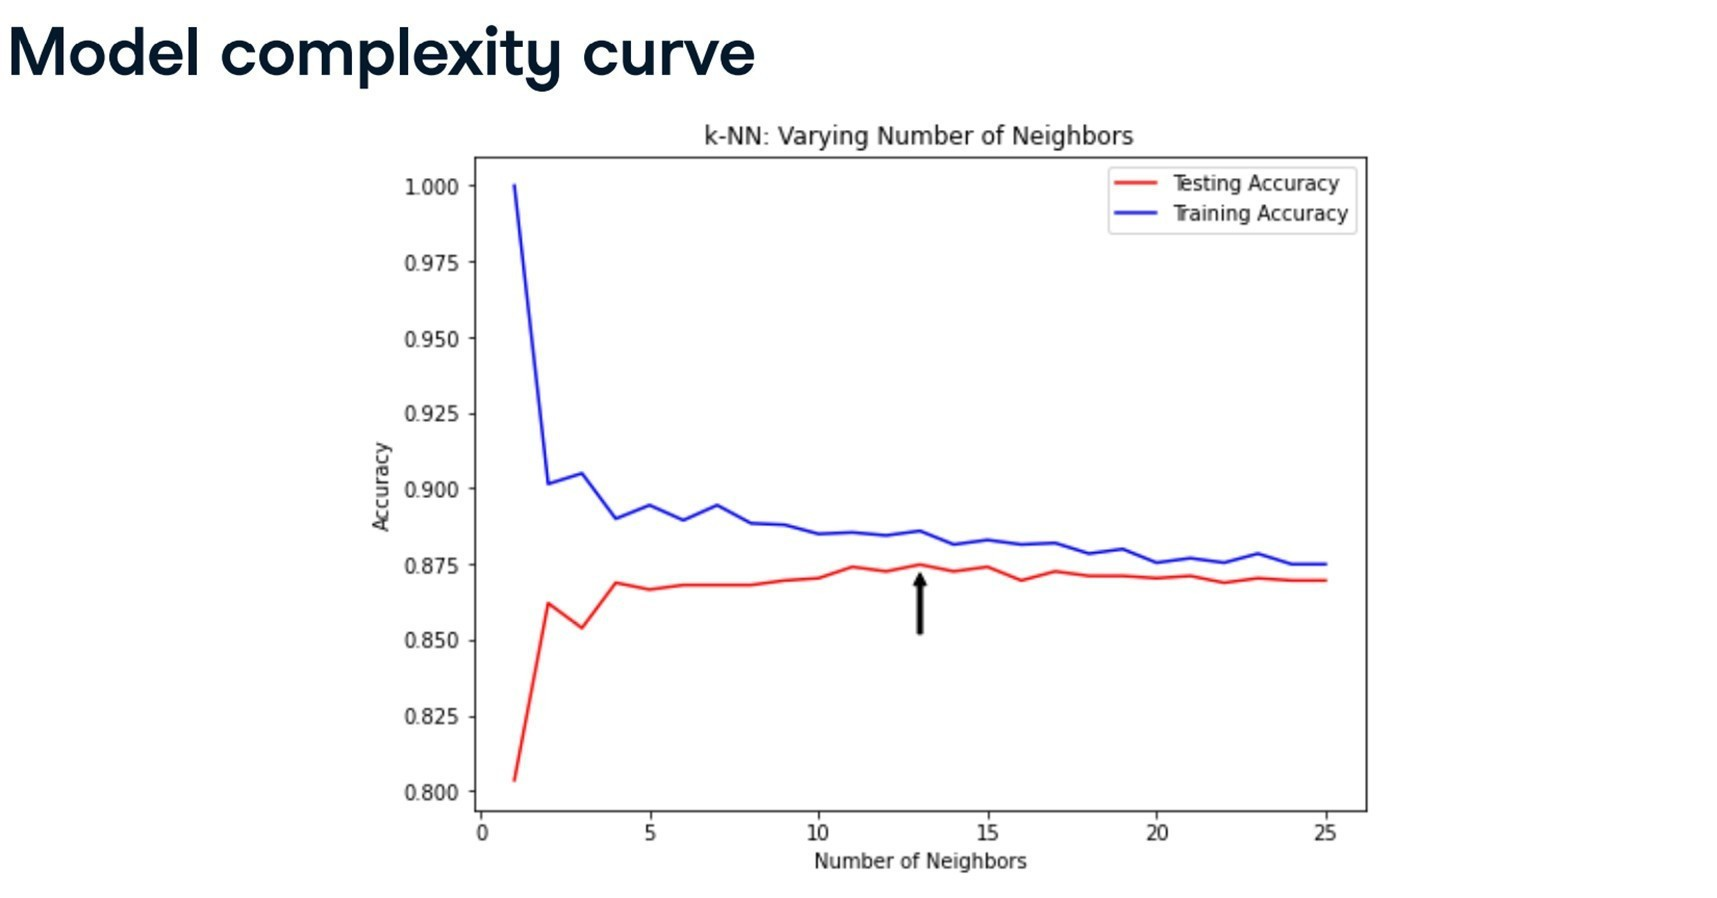

In [ ]:
# Import thư viện cần thiết
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')
# Tạo dữ liệu mẫu bằng np
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([0, 1, 0, 1, 0])
# Chia tập dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Khởi tạo danh sách để lưu trữ độ chính xác
training_accuracy = []
testing_accuracy = []
# Duyệt qua các giá trị k khác nhau
for k in range(1, 9):
    # Tạo mô hình KNN với k láng giềng (KNeighborsClassifier)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Huấn luyện mô hình trên tập huấn luyện (fit)
    knn.fit(X_train, y_train)
    # Dự đoạn trên tập train và test (predict)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    # Tính độ chính xác trên tập train và test
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))
# Vẽ đường cong chính xác (plot)
plt.plot(range(1, 21), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 21), testing_accuracy, label="Testing Accuracy")
plt.xlabel("Số lượng láng giềng (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 4, n_samples_fit = 3, n_samples = 3

(3333, 2) (3333,)
Predicted labels for training data: [1 0 0 ... 0 1 0]
Predicted labels for testing data: [0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

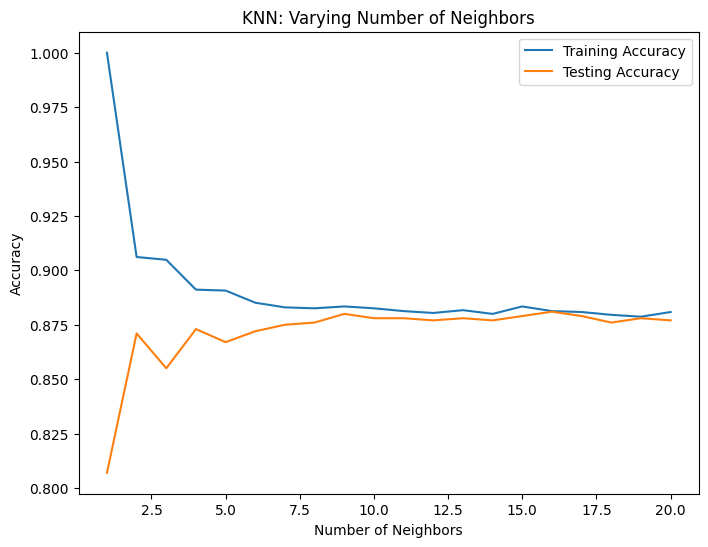

In [ ]:
# Using scilit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)
# Chia tập dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
# Khởi tạo danh sách để lưu trữ độ chính xác
neighbors = np.arange(1, 21)
training_accuracies = np.empty(len(neighbors))
testing_accuracies = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Tạo mô hình KNN với k láng giềng (KNeighborsClassifier)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Huấn luyện mô hình trên tập huấn luyện (fit)
    knn.fit(X_train, y_train)
    # Dự đoạn trên tập train và test (predict)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    # Tính độ chính xác trên tập train và test
    training_accuracies[i] = knn.score(X_train, y_train)
    testing_accuracies[i] = knn.score(X_test, y_test)
# Vẽ đường cong chính xác (plot)
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, training_accuracies, label='Training Accuracy')
plt.plot(neighbors, testing_accuracies, label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

(3333, 2) (3333,)


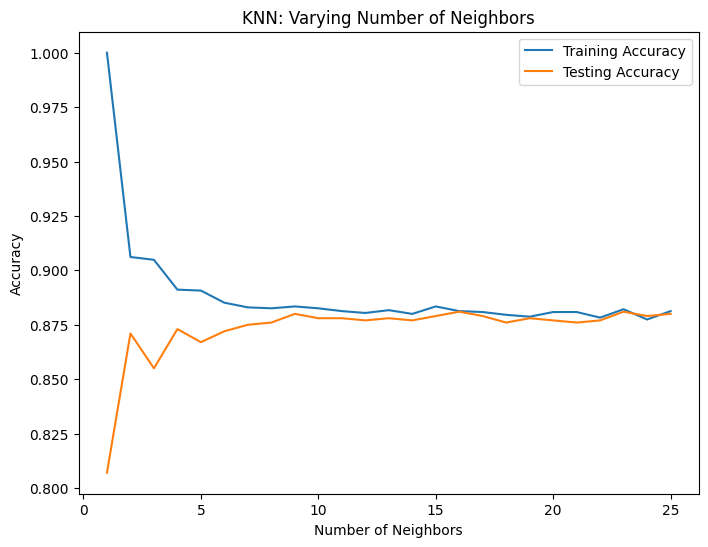

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

# Chia tập dữ liệu thành tập train và tập test (TRAIN/TEST SPLIT)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Khởi tạo danh sách để lưu trữ độ chính xác
neighbors = np.arange(1, 26)
training_accuracies = np.empty(len(neighbors))
testing_accuracies = np.empty(len(neighbors))

# Model complexity and over/underfitting
for i, k in enumerate(neighbors):
    # K-NEAREST NEIGHBORS (KNeighborsClassifier)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Huấn luyện mô hình trên tập huấn luyện (fit)
    knn.fit(X_train, y_train)
    # Dự đoạn trên tập train và test (predict)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    # Tính độ chính xác trên tập train và test
    training_accuracies[i] = knn.score(X_train, y_train)
    testing_accuracies[i] = knn.score(X_test, y_test)
# Vẽ đường cong chính xác (plot)
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, training_accuracies, label='Training Accuracy')
plt.plot(neighbors, testing_accuracies, label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


Note:
- Larger k = less complex model = can cause underfitting
- Smaller k = more complex model = can lead to overfitting

#### 7.2. Chọn k phù hợp. Nhận xét k = ? thì overfitting

Chọn k:
Kiểm tra chéo (Cross-validation):
1. Chia dữ liệu thành nhiều phần (ví dụ: 5 phần).
2. Cho mỗi phần:
- Sử dụng phần đó làm tập kiểm tra.
- Sử dụng các phần còn lại làm tập huấn luyện cho các giá trị k khác nhau.
- Lưu lại độ chính xác của từng giá trị k trên tập kiểm tra.
3. Chọn k có độ chính xác trung bình cao nhất trên tất cả các phần.
Đồ thị độ chính xác:
1. Vẽ đồ thị độ chính xác theo giá trị k.
2. Chọn k tại điểm uốn cong của đồ thị (điểm mà độ chính xác bắt đầu giảm).

Nhận xét k = ? thì overfitting:

- Khi k quá nhỏ, mô hình chỉ tập trung vào các điểm dữ liệu gần nhất và không thể học được xu hướng chung của dữ liệu. Điều này dẫn đến underfitting (thiếu khớp) và độ chính xác thấp.
- Khi k quá lớn, mô hình học được cả xu hướng chung và nhiễu trong dữ liệu. Điều này dẫn đến overfitting (quá khớp) và độ chính xác cao trên tập huấn luyện nhưng thấp trên tập kiểm tra.

Dấu hiệu của overfitting:

- Độ chính xác trên tập huấn luyện cao hơn nhiều so với độ chính xác trên tập kiểm tra.
- Đường cong độ chính xác theo k dao động mạnh.
Cách khắc phục overfitting:

- Tăng kích thước tập dữ liệu.
- Sử dụng kỹ thuật regularization (chính quy hóa) như L1 hoặc L2.
- Sử dụng kỹ thuật early stopping (dừng sớm).

Kết luận:

- Việc chọn k phù hợp là rất quan trọng để đạt được hiệu suất tốt nhất cho thuật toán KNN.
- Cross-validation và đồ thị độ chính xác là hai phương pháp phổ biến để chọn k.
- Overfitting xảy ra khi k quá lớn và có thể được khắc phục bằng cách tăng kích thước tập dữ liệu, sử dụng kỹ thuật regularization hoặc early stopping.

#### 7.3. Overfitting là gì?

Overfitting (hay quá khớp) là hiện tượng xảy ra khi mô hình học máy học quá tốt trên tập dữ liệu huấn luyện, dẫn đến việc nó không thể khái quát hóa tốt cho các dữ liệu mới.

Giả sử bạn có một mô hình KNN để phân loại các loài hoa. Mô hình được huấn luyện trên một tập dữ liệu gồm 100 hình ảnh hoa, 50 hình ảnh của mỗi loài.

Nếu bạn chọn k quá nhỏ, mô hình có thể không học được xu hướng chung của dữ liệu và dẫn đến underfitting.
Nếu bạn chọn k quá lớn, mô hình có thể học được cả xu hướng chung và nhiễu trong dữ liệu, dẫn đến overfitting.

### 8. Machine Learning-KNN Algorithm with EDA

#### 8.1.Importing Dataset

#### 8.2.EDA


#### 8.3.Linear Regression

#### 8.4.KNN Algorithm

#### 8.5.Conclusion